Import necessary libraries

In [1]:
import numpy as np, cmath
import scipy.io
from matplotlib import pyplot as plt

from numpy import pi, sin, cos, exp, log, random  #import basic functions from numpy that we'll need

%matplotlib inline

Import optional library Seaborn for pretty plots.

In [2]:
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

### Figure 11.1

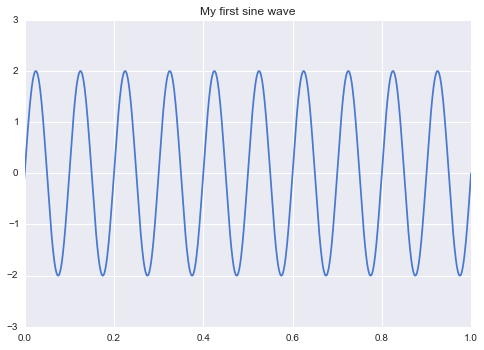

In [3]:
srate = 1000. #sampling rate of 1kHz
time = np.arange(-1,1 +1/srate,1/srate) 
freq = 10 #in Hz
amp = 2 #amplitude of sine wave

sine_wave = amp*sin(2*pi*freq*time)

plt.figure()
plt.plot(time,sine_wave)
plt.axis([0,1,-3,3])
_=plt.title("My first sine wave")

###Figure 11.2

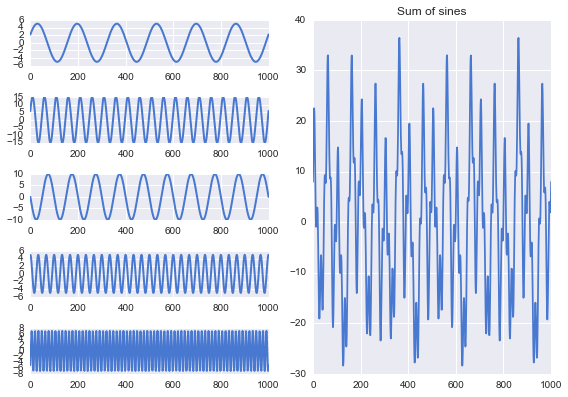

In [4]:
srate = 500. #sampling rate in Hz

#create arrays of frequencies, amplitudes, and phases to plot
frex = np.array([3, 10, 5 ,15, 35])
amplit = np.array([5,15,10,5,7])
phases = np.pi*np.array([1/7.,1/8.,1.,1/2.,-1/4.])

time = np.arange(-1,1 +1/srate,1/srate) 


sine_waves = np.zeros([len(frex),len(time)])
for fi in xrange(len(frex)):
    sine_waves[fi,:] = amplit[fi] * sin(2*pi*frex[fi]*time +phases[fi])

#plot each sine wave individually
plt.figure()

for fi in xrange(len(frex)):
    plt.subplot(len(frex),2,2*(fi+1)-1)
    plt.plot(sine_waves[fi,:],linewidth=2)
        
#plot the sum of all sum waves
plt.subplot(1,2,2)
plt.plot(np.sum(sine_waves,axis=0))
plt.tight_layout()    
_=plt.title("Sum of sines")

### Figure 11.3

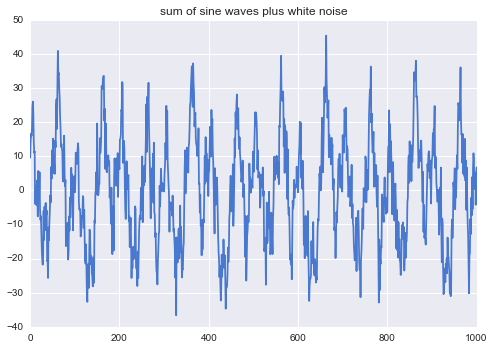

In [5]:
plt.figure()
noise = 5 * random.randn(np.shape(sine_waves)[1])
plt.plot( np.sum(sine_waves,axis=0) + noise )
_=plt.title("sum of sine waves plus white noise")

### Figure 11.4

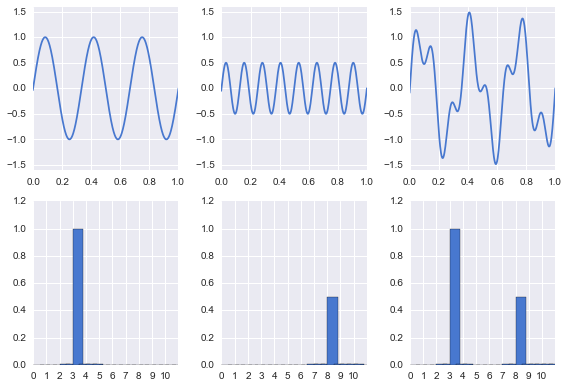

In [6]:
time = np.arange(-1,1+1/srate,1/srate)

#create three sine waves
s1 = sin(2*pi*3*time)
s2 = 0.5 * sin(2*pi*8*time)
s3 = s1 + s2

#plot the sine waves
f = plt.figure()

for ii in xrange(3):    
    plt.subplot(2,3,ii+1)
    
    #plot the sinusoids using the eval command, which evaluates the input string
    eval("plt.plot(time,s"+str(ii+1)+")")
    plt.axis([0,1,-1.6,1.6])
    plt.yticks(np.arange(-1.5,2,.5))
    
    plt.subplot(2,3,ii+1+3)
    
    f = eval("np.fft.fft(s" + str(ii+1) +")/float(len(time))")
    hz = np.linspace(0,srate/2.,np.floor(len(time)/2.)+1) # we only have resolution up to SR/2 (Nyquist theorem)
    plt.bar(hz,np.absolute(f[:len(hz)]*2))
    plt.axis([0,11,0,1.2])
    plt.xticks(np.arange(0,11))
    
plt.tight_layout()

### Figure 11.5

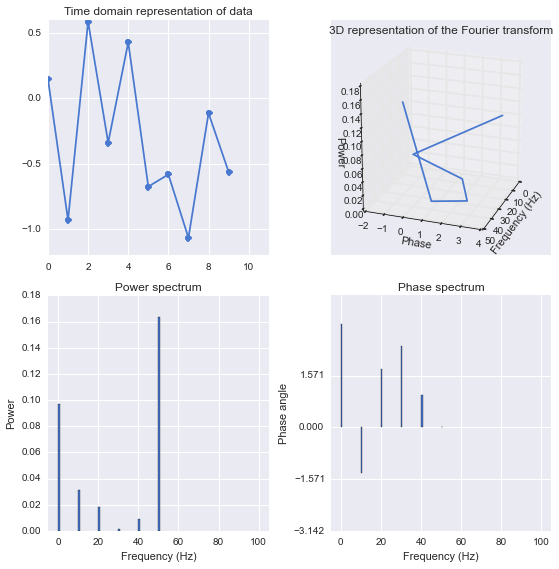

In [8]:
from mpl_toolkits.mplot3d import Axes3D
N = 10 #length of sequence
data = random.randn(N) #create random numbers, sampled from normal distribution
srate = 100 #sampling rate in Hz
nyquist = srate/2 #Nyquist frequency -- highest frequency you can measure the data

#initialize matrix for Fourier output

frequencies = np.linspace(0,nyquist,N/2+1)
time = np.arange(N)/float(N)

#Fourier transform is dot product between sine wave and data at each frequency
fourier = np.zeros(N)*1j #create complex matrix
for fi in xrange(N):
    sine_wave = np.exp(-1j *2 *pi*fi*time)
    fourier[fi] = np.sum(sine_wave*data)
    
fourier = fourier/float(N)


fig=plt.figure(figsize=(8,8))

plt.subplot(221)
plt.plot(data,"-o")
plt.xlim([0,N+1])
plt.title("Time domain representation of data")

ax = fig.add_subplot(222, projection='3d')
ax.plot(frequencies,np.angle(fourier[:N/2+1]),zs=np.absolute(fourier[:N/2+1])**2)
ax.view_init(20, 20)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase')
ax.set_zlabel('Power')
plt.title("3D representation of the Fourier transform")


plt.subplot(223)
plt.bar(frequencies,np.absolute(fourier[:N/2+1])**2)
plt.xlim([-5, 105])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Power spectrum")

plt.subplot(224)
plt.bar(frequencies,np.angle(fourier[:N/2+1]))
plt.xlim([-5, 105])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase angle")
plt.yticks(np.arange(-pi,pi,pi/2.))

plt.title("Phase spectrum")

plt.tight_layout()

###Figure 11.6

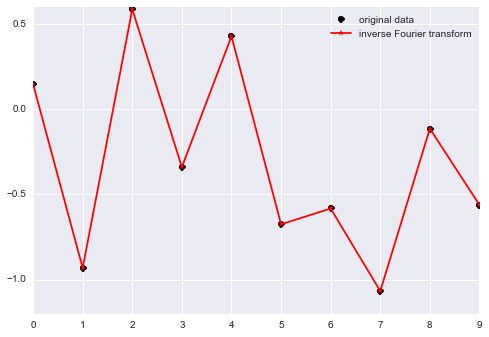

In [9]:
reconstructed_data = np.zeros(N)

for fi in xrange(N):
    #scale sine wave by fourier coefficient
    sine_wave = fourier[fi] * exp(1j *2 * pi * fi * time)
    
    
    #sum the sine waves together, and take only the real part
    reconstructed_data += np.real(sine_wave)
    
plt.figure()
plt.plot(data,'ko',linewidth=4)
plt.plot(reconstructed_data,'r-*')
_=plt.legend(["original data","inverse Fourier transform"])


###Figure 11.7


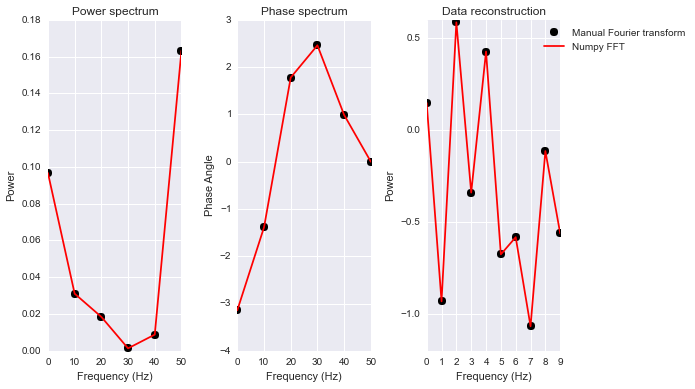

In [12]:
fft_data = np.fft.fft(data)/N

plt.figure()

plt.subplot(131)
plt.plot(frequencies,np.absolute(fourier[:N/2+1])**2,'ko',markersize=8,linewidth=5)
plt.plot(frequencies,np.absolute(fft_data[:N/2+1])**2,'r*-',markersize=1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Power spectrum")

plt.subplot(132)

#wrap the computed phase angles because +pi = -pi
phase_manual = (np.angle(fourier[:N/2+1])  + pi) % (2 * pi ) - pi
phase_fft = (np.angle(fft_data[:N/2+1])  + pi) % (2 * pi ) - pi

plt.plot(frequencies,phase_manual,'ko',markersize=8,linewidth=5)
plt.plot(frequencies,phase_fft,'r*-',markersize=1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Angle")
plt.title("Phase spectrum")

plt.tight_layout()

#below line is a little verbose, but it is just real(ifft(fft(data)))
ifftData = np.real(np.fft.ifft(np.fft.fft(data))) 

plt.subplot(133)
plt.plot(reconstructed_data,'ko',markersize=8,linewidth=5)
plt.plot(ifftData,'r*-',markersize=1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Data reconstruction")

plt.legend(["Manual Fourier transform","Numpy FFT"], bbox_to_anchor = (2, 1))

plt.tight_layout()

###Figure 11.9

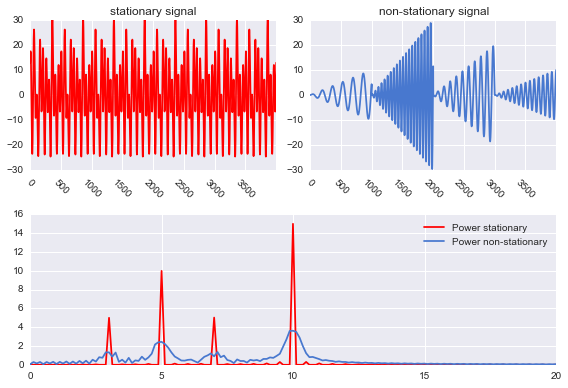

In [13]:
#create array of frequencies, amplitudes, and phases
frex = np.array([3,10,5,7])
amplit = np.array([5,15,10,5])
phases = pi*np.array([1/7.,1/8.,1,1/2.])

#create a time series of sequenced sine waves

srate = 500.
time = np.arange(-1,1+1/srate,1/srate)
stationary = np.zeros(len(time)*len(frex))
nonstationary = np.zeros(len(time)*len(frex))

for fi in xrange(len(frex)):
    #compute sine wave
    temp_sine_wave = amplit[fi] * sin(2*pi*frex[fi]*time+phases[fi])
    
    #enter into stationary time series
    stationary = stationary + np.tile(temp_sine_wave,(1,len(frex)))
    
    #optional change of amplitude over time
    temp_sine_wave *=time+1
    
    #start and stop indices for insertion of sine wave
    start_idx = fi * len(time)
    stop_idx = fi *len(time) + len(time)
    
    #enter into non-stationary time series
    nonstationary[start_idx:stop_idx] = temp_sine_wave

    
plt.figure()
plt.subplot(221)
plt.plot(stationary[0],'r')
plt.axis([0,stationary.shape[1],-30,30])
plt.title("stationary signal")
_,xticks=plt.xticks(np.arange(0,4000,500))
plt.setp(xticks,rotation=-45)

plt.subplot(222)
plt.plot(nonstationary)
plt.xlim([1,len(nonstationary)])
plt.title("non-stationary signal")
_,xticks=plt.xticks(np.arange(0,4000,500))
plt.setp(xticks,rotation=-45)

frequencies = np.linspace(0,srate/2,len(nonstationary)/2+1)
fft_nonstationary = np.fft.fft(nonstationary)/len(nonstationary)
fft_stationary = np.fft.fft(stationary[0])/stationary.shape[1]

plt.subplot(212)
plt.plot(frequencies,np.absolute(fft_stationary[:len(frequencies)]*2),'r')
plt.plot(frequencies,np.absolute(fft_nonstationary[:len(frequencies)]*2))
plt.xlim([0,np.max(frex)*2])
plt.legend(["Power stationary","Power non-stationary"])

plt.tight_layout()    

###Figure 11.10

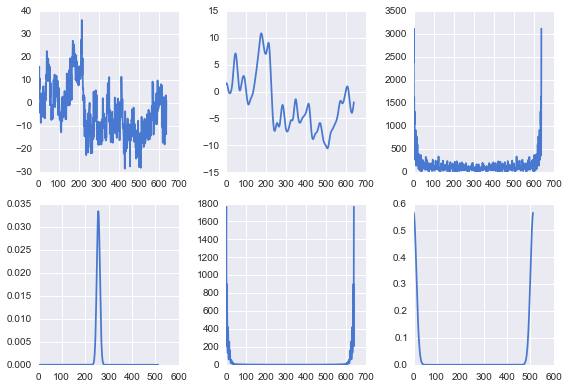

In [14]:
data=scipy.io.loadmat("sampleEEGdata.mat")


eegdat4convol=np.squeeze(data["EEG"][0,0]["data"][46,:,0])
srate = float(data["EEG"][0,0]["srate"][0,0])

#create a Gaussian
time = np.arange(-1,1+1/srate,1/srate)
s = 5/float(2*pi*30) #standard deviation
gaussian = 1/30.*exp((-time**2)/(2*s**2)) 


plt.figure()
plt.subplot(231)
plt.plot(eegdat4convol)

plt.subplot(234)
plt.plot(gaussian)

plt.subplot(232)
convolvedSig=np.convolve(eegdat4convol,gaussian,mode='same')
plt.plot(convolvedSig)

plt.subplot(235)
plt.plot(np.absolute(np.fft.fft(convolvedSig)))


plt.subplot(233)
plt.plot(np.absolute(np.fft.fft(eegdat4convol)))


plt.subplot(236)
plt.plot(np.absolute(np.fft.fft(gaussian)))


plt.tight_layout()

###Figure 11.11

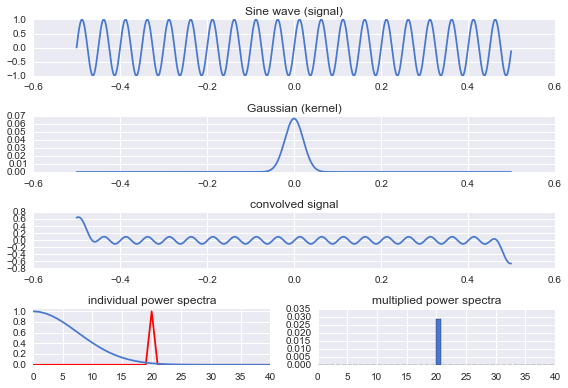

In [15]:
srate = 1000.
time = np.arange(-0.5,0.5,1/srate)
f = 20
fg = np.array([15, 5])
s = sin(2*pi*f*time)

def plotConvolutionTheorem(ii=0):
    assert(ii<3 and ii>=0)
    
    g = exp((-time**2)/(2*(4/((2*pi*fg[ii])**2))))/fg[ii]
    plt.figure()

    plt.subplot(411)
    plt.plot(time,s)
    plt.title("Sine wave (signal)")

    plt.subplot(412)
    plt.plot(time,g)
    plt.title("Gaussian (kernel)")

    plt.subplot(413)
    plt.plot(time,np.convolve(s,g,mode="same"))
    plt.title("convolved signal")

    plt.subplot(427)
    fft_s = np.absolute(np.fft.fft(s))
    fft_s = fft_s[:np.floor(len(fft_s)/2)+1]/np.max(fft_s[:np.floor(len(fft_s)/2)+1])
    plt.plot(np.arange(0,501),fft_s,'r')

    fft_g = np.absolute(np.fft.fft(g))
    fft_g = fft_g[:np.floor(len(fft_g)/2)+1] / np.max(fft_g[:np.floor(len(fft_g)/2)+1])
    plt.plot(np.arange(0,501),fft_g)
    plt.axis([0,40,0,1.05])
    plt.title("individual power spectra")


    plt.subplot(428)
    plt.bar(np.arange(0,501),fft_g*fft_s)
    plt.axis([0,40,0,0.035])
    plt.title("multiplied power spectra")

    plt.tight_layout()

plotConvolutionTheorem(ii=0)

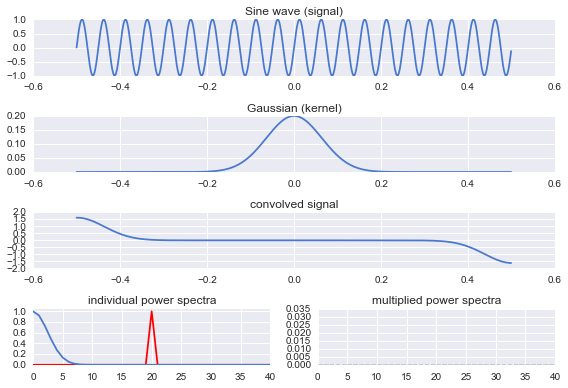

In [16]:
plotConvolutionTheorem(ii=1)

###Figure 11.12

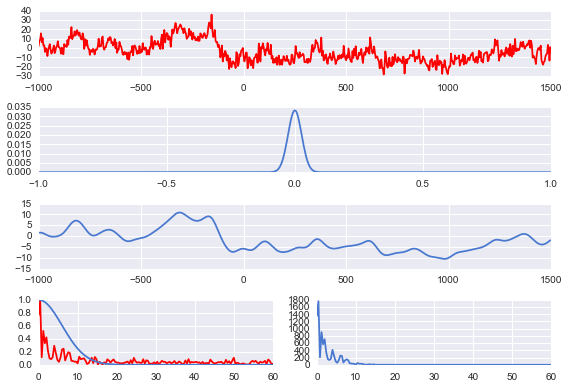

In [43]:
EEGtimes = data["EEG"][0,0]["times"][0]
srate = float(data["EEG"][0,0]["srate"][0,0])

time = np.arange(-1,1+1/srate,1/srate)
s = 5/(2*pi*30)
gaussian = exp((-time**2)/(2*s**2))/30.


plt.figure()

#plot EEG data
plt.subplot(411)
plt.plot(EEGtimes,eegdat4convol,'r')

#plot Gaussian
plt.subplot(412)
plt.plot(time,gaussian)

#plot convolved
plt.subplot(413)
plt.plot(EEGtimes,np.convolve(eegdat4convol,gaussian,mode="same"))

# Plot power spectrum of signal
plt.subplot(427)
nfft = len(eegdat4convol)
fft_s = np.absolute(np.fft.fft(eegdat4convol,nfft))
fft_s = fft_s[:np.floor(nfft/2)+1]
f = np.linspace(0,srate/2,np.floor(nfft/2)+1)
plt.plot(f,fft_s/np.max(fft_s),'r')

#plot power spectrum of Gaussian
fft_g = np.absolute(np.fft.fft(gaussian,nfft))
fft_g = fft_g[:np.floor(nfft/2)+1]
plt.plot(f,fft_g/np.max(fft_g))
plt.xlim([0,60])


#plot the convolved power spectrum
plt.subplot(428)
plt.plot(f,fft_s*fft_g)
plt.xlim([0,60])

plt.tight_layout()